In [43]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [44]:
fname_symptom = 'databases' + os.sep + 'orphadata' + os.sep + 'symptoms_HPO.dat'
fname_disease = 'databases' + os.sep + 'orphadata' + os.sep + 'diseases_HPO.dat'
fname_arr = 'databases' + os.sep + 'orphadata' + os.sep + 'matrix_HPO.dat'
fname_symptom_patient = 'databases' + os.sep + 'orphadata' + os.sep + 'rare_symptom_vector_HPO.dat'

def read_pickle(fname):
    with open(fname, 'rb') as f:
        x = pickle.load(f)
    return x

symptoms = read_pickle(fname_symptom)
diseases = read_pickle(fname_disease)
symptom_disease_arr = read_pickle(fname_arr)
patient_symptoms = read_pickle(fname_symptom_patient)
print(type(symptoms), type(diseases), type(symptom_disease_arr), type(symptom_disease_arr[0]))
print(len(symptoms), len(diseases), len(symptom_disease_arr), len(symptom_disease_arr[0]))
print(len(patient_symptoms), len(diseases), len(symptom_disease_arr), len(symptom_disease_arr[0]))

(<type 'list'>, <type 'list'>, <type 'list'>, <type 'list'>)
(6371, 3563, 3563, 6371)
(6371, 3563, 3563, 6371)


In [50]:
row_normalize = True
B = np.array(symptom_disease_arr)

print(B.shape)
n_disease = B.shape[0]
n_symptom = B.shape[1]
assert B.shape[0] == 3563

if row_normalize:
    row_sums = B.sum(axis=1)
    B_norm = B / row_sums[:, np.newaxis]
    row_sums = B_norm.sum(axis=1)
    print (row_sums, np.min(row_sums), np.max(row_sums))

(3563, 6371)
(array([1., 1., 1., ..., 1., 1., 1.]), 0.9999999999999996, 1.0000000000000004)


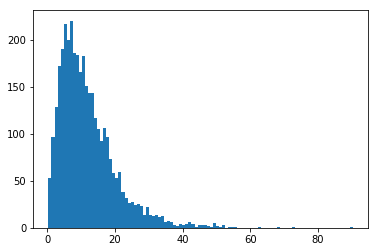

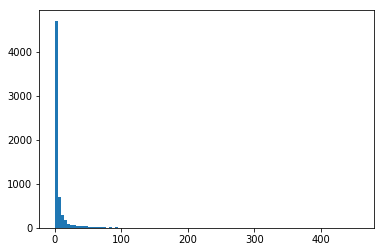

In [51]:
plt.hist(np.dot(B, np.ones(n_symptom)), bins=100)
plt.show()

plt.hist(np.dot(B.T, np.ones(n_disease)), bins=100)
plt.show()

In [52]:
diseases_patient = np.dot(B, patient_symptoms)

sorted_diseases = np.argsort(diseases_patient)[::-1]

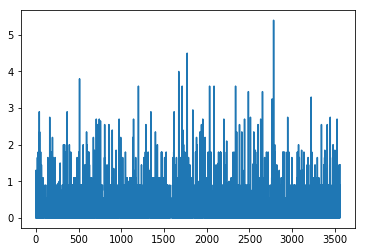

In [53]:
plt.plot(diseases_patient)

In [54]:
print("Diseases from symptom vector")
for idx in range(10):
    print('Rank %d' % idx, diseases[sorted_diseases[idx]], diseases_patient[sorted_diseases[idx]])

Diseases from symptom vector
('Rank 0', 'Mitochondrial neurogastrointestinal encephalomyopathy', 5.4)
('Rank 1', 'Acute intermittent porphyria', 4.5)
('Rank 2', 'Aggressive systemic mastocytosis', 4.0)
('Rank 3', 'Williams syndrome', 3.8000000000000003)
('Rank 4', 'Addison disease', 3.6)
('Rank 5', 'Rabies', 3.6)
('Rank 6', 'Late-onset isolated ACTH deficiency', 3.6)
('Rank 7', 'Acute adrenal insufficiency', 3.6)
('Rank 8', 'Hereditary coproporphyria', 3.6)
('Rank 9', 'Lynch syndrome', 3.45)
